# 🐻‍❄️ Exploración de Datos (EDA) – Polar Bears

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm
from warnings import filterwarnings

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import plotly.express as px

In [77]:
filterwarnings('ignore')
plt.style.use("seaborn-v0_8-white")
sns.set_context("notebook")
tqdm.pandas()

## 1. Cargar datos procesados

In [78]:
df = pd.read_parquet("../data/processed/rich_dataset.parquet")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["date"] = df["timestamp"].dt.date
df.head()


,UniqueAnimalID,timestamp,mu_lat,mu_lon,se_mu_x,se_mu_y,adj_lat,adj_lon,prev_lat,prev_lon,...,time_diff_hr,velocity_kmh,prev_velocity,acceleration_kmph2,date,daylight_hours,is_polar_night,is_midnight_sun,year,month
0,1,1986-07-01 12:00:00,69.7718,-141.3942,9375,9375,69.761663,-141.428310,69.769565,-141.323069,...,6.0,0.693069,NaN,NaN,1986-07-01,24.0,False,True,1986,7
1,1,1986-07-01 18:00:00,69.7730,-141.3960,5835,5835,69.772693,-141.403451,69.761663,-141.428310,...,6.0,0.260104,0.693069,-0.072161,1986-07-01,24.0,False,True,1986,7
2,1,1986-07-02 00:00:00,69.7738,-141.3834,2517,2517,69.773429,-141.388987,69.772693,-141.403451,...,6.0,0.094055,0.260104,-0.027675,1986-07-02,24.0,False,True,1986,7
3,1,1986-07-02 06:00:00,69.7736,-141.3448,5323,5323,69.764930,-141.331186,69.773429,-141.388987,...,6.0,0.404117,0.094055,0.051677,1986-07-02,24.0,False,True,1986,7
4,1,1986-07-02 12:00:00,69.7727,-141.2902,8840,8840,69.783728,-141.265125,69.764930,-141.331186,...,6.0,0.550249,0.404117,0.024355,1986-07-02,24.0,False,True,1986,7


## 2. Información general

In [79]:
print("Shape:", df.shape)
df.info()


Shape: (294608, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294608 entries, 0 to 294607
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   UniqueAnimalID      294608 non-null  int64         
 1   timestamp           294608 non-null  datetime64[ns]
 2   mu_lat              294608 non-null  float64       
 3   mu_lon              294608 non-null  float64       
 4   se_mu_x             294608 non-null  int64         
 5   se_mu_y             294608 non-null  int64         
 6   adj_lat             294608 non-null  float64       
 7   adj_lon             294608 non-null  float64       
 8   prev_lat            294608 non-null  float64       
 9   prev_lon            294608 non-null  float64       
 10  prev_time           294608 non-null  datetime64[ns]
 11  distance_km         294608 non-null  float64       
 12  time_diff_hr        294608 non-null  float64       
 13  velocity_

In [80]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294608 entries, 0 to 294607
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    294608 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [81]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
UniqueAnimalID,294608.0,NaN,NaN,NaN,252.628374,1.0,108.0,279.0,361.0,541.0,151.715418
timestamp,294608,NaN,NaN,NaN,2001-02-27 05:56:12.861565440,1985-07-01 12:00:00,1992-07-22 12:00:00,2002-08-31 12:00:00,2008-11-06 18:00:00,2017-11-30 18:00:00,NaN
mu_lat,294608.0,NaN,NaN,NaN,72.297741,65.071,70.8465,71.87895,73.4422,79.9997,2.083219
mu_lon,294608.0,NaN,NaN,NaN,-154.587568,-179.9999,-166.18885,-152.41805,-144.132,-111.1043,14.039377
se_mu_x,294608.0,NaN,NaN,NaN,10319.439184,11.0,2752.0,8648.5,15499.0,66766.0,8852.1088
se_mu_y,294608.0,NaN,NaN,NaN,10319.439184,11.0,2752.0,8648.5,15499.0,66766.0,8852.1088
adj_lat,294608.0,NaN,NaN,NaN,72.297727,65.073795,70.846363,71.87852,73.441537,80.01218,2.083296
adj_lon,294608.0,NaN,NaN,NaN,-154.587449,-180.185209,-166.190134,-152.415236,-144.130622,-111.104288,14.03965
prev_lat,294608.0,NaN,NaN,NaN,72.297619,65.073795,70.846665,71.878341,73.440194,80.01218,2.082077
prev_lon,294608.0,NaN,NaN,NaN,-154.584399,-180.185209,-166.182098,-152.413662,-144.131772,-111.104288,14.035452


## 3. Valores nulos

In [82]:
null_summary = df.isnull().sum().to_frame(name='nulos')
null_summary["porcentaje"] = 100 * null_summary["nulos"] / len(df)
null_summary[null_summary["nulos"] > 0]

,nulos,porcentaje
prev_velocity,393,0.133398
acceleration_kmph2,393,0.133398


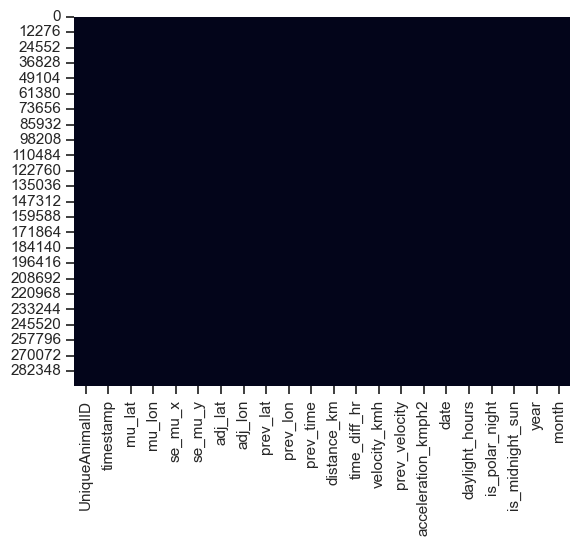

In [83]:
sns.heatmap(df.isnull(), cbar=False);

* Verificar duplicados

In [84]:
df.duplicated(subset=["UniqueAnimalID", "timestamp", "mu_lat", "mu_lon"]).sum()

np.int64(0)

* Coord no válidas

In [87]:
# Coordenadas fuera de rango
bad_coords = df[
    (df["adj_lat"] < 60) | (df["adj_lat"] > 85) |
    (df["adj_lon"] < -180) | (df["adj_lon"] > -90)
]
print(f"Número de coordenadas ajustadas fuera de rango: {len(bad_coords)}")


Número de coordenadas ajustadas fuera de rango: 95


In [86]:
def filtrar_coord_fuera_de_rango(df, lat_bounds=(60, 85), lon_bounds=(-180, -90)):
    """
    Filtra filas con coordenadas ajustadas fuera del rango válido.
    Devuelve el DataFrame limpio y el número de filas eliminadas.
    """
    before = len(df)
    df_filtrado = df[
        (df["adj_lat"] >= lat_bounds[0]) & (df["adj_lat"] <= lat_bounds[1]) &
        (df["adj_lon"] >= lon_bounds[0]) & (df["adj_lon"] <= lon_bounds[1])
    ].copy()
    after = len(df_filtrado)
    print(f"Se eliminaron {before - after} registros con coordenadas ajustadas fuera de rango.")
    return df_filtrado


In [88]:
# Antes de aplicar
print("Antes:", df.shape)

df = filtrar_coord_fuera_de_rango(df)

# Después de aplicar
print("Después:", df.shape)

Antes: (294608, 22)
Se eliminaron 95 registros con coordenadas ajustadas fuera de rango.
Después: (294513, 22)


## 4. Individuos únicos y rango temporal

In [89]:
print("Número de osas únicas:", df["UniqueAnimalID"].nunique())
print("Rango temporal:", df["timestamp"].min().date(), "→", df["timestamp"].max().date())


Número de osas únicas: 393
Rango temporal: 1985-07-01 → 2017-11-30


In [90]:
# CARGA DATASET PRINCIPAL
df_orig = pd.read_csv("../data/raw/polarBear_CTCRWlocations_chukchiBeaufort_1985-2017.csv")

df_orig["timestamp"] = pd.to_datetime(df_orig["timestamp"])
df_orig = df_orig.sort_values(["UniqueAnimalID", "timestamp"])

print("Número de osas únicas:", df_orig["UniqueAnimalID"].nunique())


Número de osas únicas: 406


In [91]:
ids_raw = set(df_orig["UniqueAnimalID"].unique())
ids_enriched = set(df["UniqueAnimalID"].unique())

# IDs perdidos
ids_perdidos = ids_raw - ids_enriched

print(f"Número de osas perdidas: {len(ids_perdidos)}")
print(sorted(ids_perdidos))

Número de osas perdidas: 13
[np.int64(93), np.int64(137), np.int64(139), np.int64(148), np.int64(157), np.int64(194), np.int64(197), np.int64(198), np.int64(199), np.int64(200), np.int64(201), np.int64(478), np.int64(520)]


In [92]:
df_orig[df_orig.UniqueAnimalID == 93]

,UniqueAnimalID,timestamp,mu_lat,mu_lon,se_mu_x,se_mu_y
64625,93,1988-07-01 00:00:00,72.1105,170.9334,5060,5060
64626,93,1988-07-01 06:00:00,72.1091,170.8141,5926,5926
64627,93,1988-07-01 12:00:00,72.1043,170.6920,8113,8113
64628,93,1988-07-01 18:00:00,72.0971,170.5699,10215,10215
64629,93,1988-07-02 00:00:00,72.0884,170.4507,11809,11809
...,...,...,...,...,...,...
65232,93,1988-11-29 18:00:00,72.7624,171.2912,21420,21420
65233,93,1988-11-30 00:00:00,72.7632,171.2880,23208,23208
65234,93,1988-11-30 06:00:00,72.7637,171.2857,24618,24618
65235,93,1988-11-30 12:00:00,72.7640,171.2841,25655,25655


Es un resultado esperado: la osa 93 fue excluida porque está fuera de la región geográfica válida definida por tu filtro (está en Siberi oriental)

## 5. Trayectoria de un oso (ejemplo ID 418)

* Seaborn

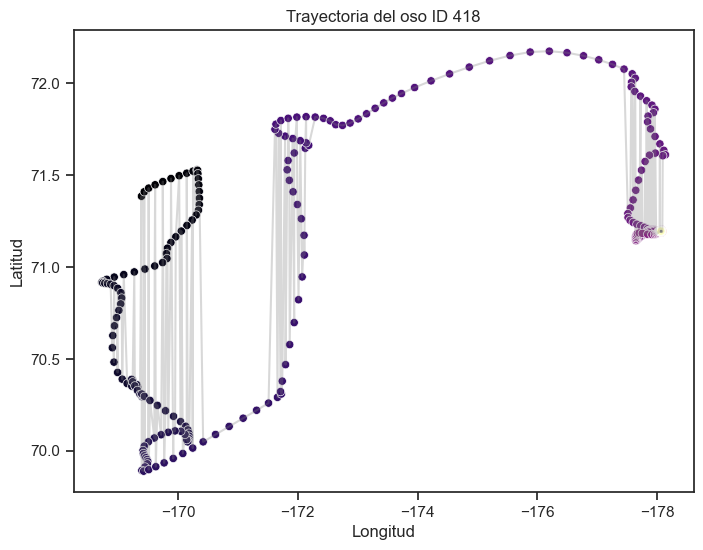

In [104]:
id_ejemplo = 418
df_418 = df[df["UniqueAnimalID"] == id_ejemplo]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_418, x="mu_lon", y="mu_lat", hue="timestamp", palette="magma", legend=False)
sns.lineplot(data=df_418, x="mu_lon", y="mu_lat", color="gray", alpha=0.3)
plt.title(f"Trayectoria del oso ID {id_ejemplo}")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(False)
plt.gca().invert_xaxis()
plt.show();


* cartopy

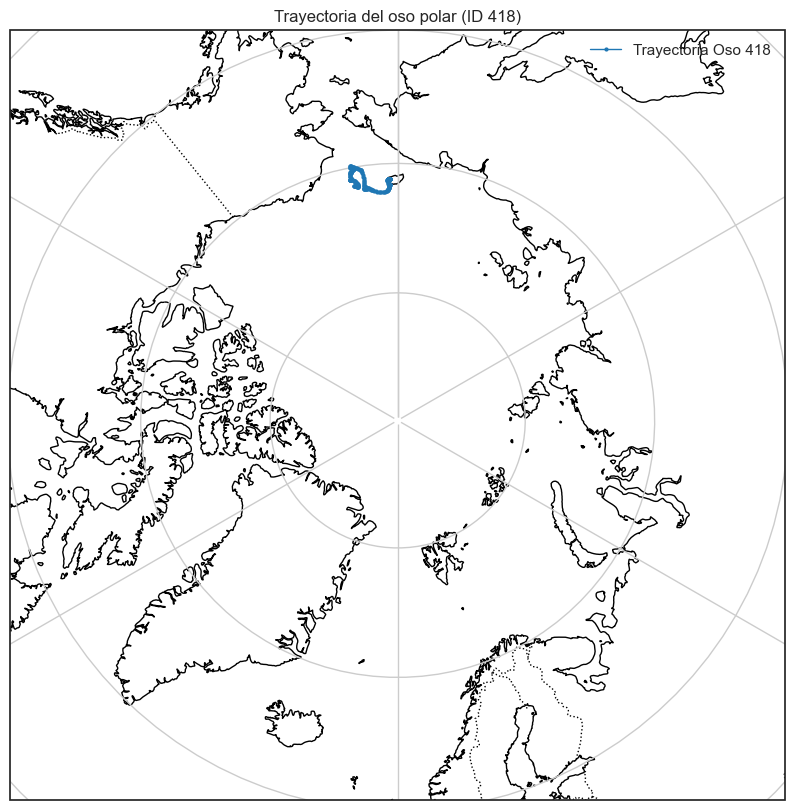

In [105]:
# Seleccionar un oso
bear = df[df['UniqueAnimalID'] == 418]

# Crear figura con proyección polar estereográfica norte
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Agregar elementos geográficos
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Plotear la trayectoria
ax.plot(
    bear['mu_lon'], bear['mu_lat'],
    transform=ccrs.PlateCarree(),
    marker='o', markersize=2, linewidth=1,
    label='Trayectoria Oso 418'
)

plt.title('Trayectoria del oso polar (ID 418)')
plt.legend()
plt.show();


In [106]:
# # df_filtrado = df[(df['id_oso'].isin(lista_osos)) & (df['año'] == año_seleccionado)]
# df_filtrado = df[(df['UniqueAnimalID'] == 418)]

# fig = px.scatter_mapbox(
#     df_filtrado,
#     lat="mu_lat",
#     lon="mu_lon",
#     color="season",  # Esto codifica por estación
#     # animation_frame="año",  # Si lo deseas animado por año
#     mapbox_style="carto-positron",
#     zoom=3,
#     height=600
# )
# fig.show()

## 6. Registros temporales

* por mes

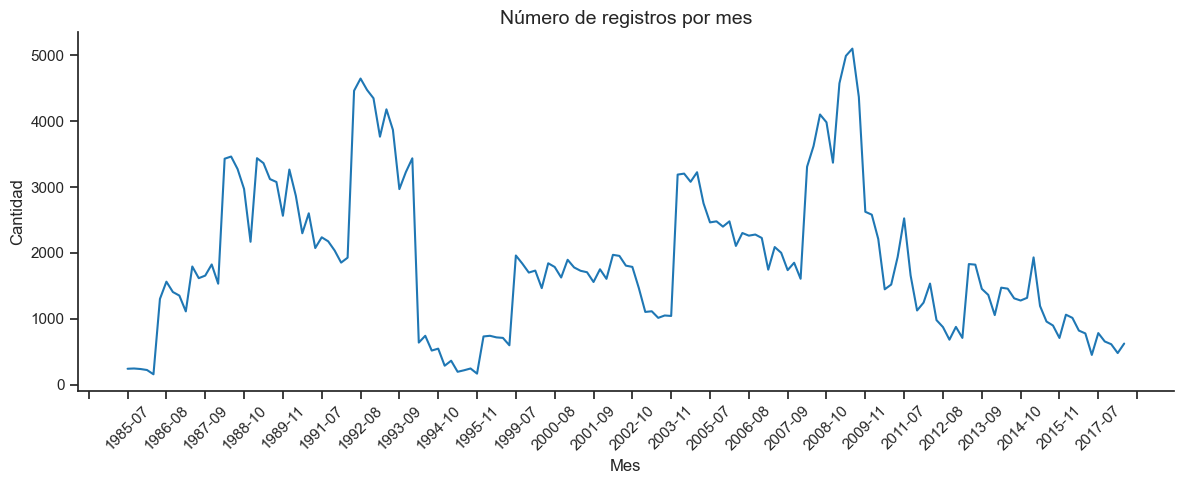

In [97]:
# Asegurar columna 'month' como periodo mensual
df["month"] = df["timestamp"].dt.to_period("M").astype(str)

# Agrupar y ordenar
monthly_counts = df["month"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, color="#1f77b4")

plt.title("Número de registros por mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)

# Rotar ticks
plt.xticks(rotation=45)

# Mostrar solo 1 de cada 6 ticks (control de densidad)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))

# Limpiar bordes y grid
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


* por año

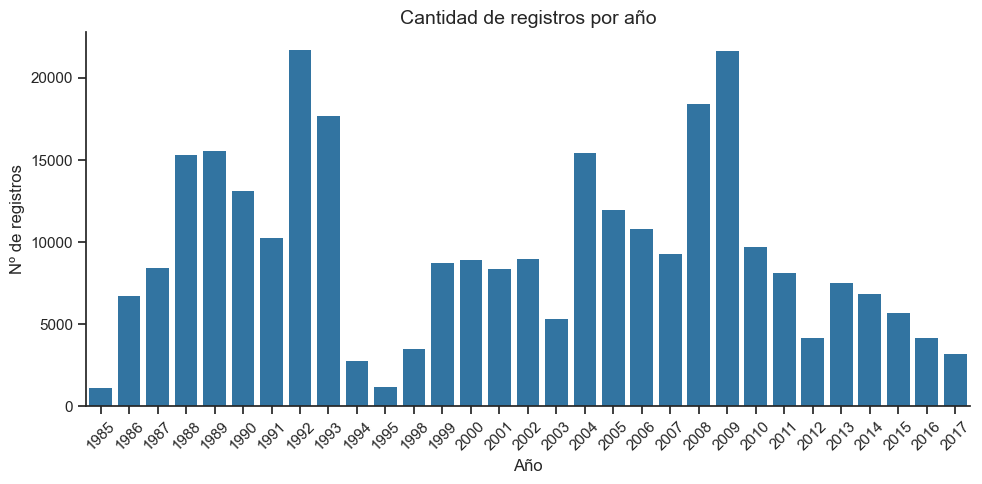

In [107]:
df["year"] = df["timestamp"].dt.year
year_counts = df["year"].value_counts().sort_index().reset_index()
year_counts.columns = ["year", "count"]

plt.figure(figsize=(10, 5))
sns.barplot(data=year_counts, x="year", y="count", color="#1f77b4")

plt.title("Cantidad de registros por año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Nº de registros", fontsize=12)
plt.xticks(rotation=45)

plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.show();


## 7. Exploración por individuo

* Número de registros por `UniqueAnimalID`.
* Longitud de trayectorias (en tiempo y espacio).
* Cambios de dirección (`bearing_change`) y sus patrones.

### 1. Número de registros por UniqueAnimalID

In [108]:
registros_por_osa = df["UniqueAnimalID"].value_counts().sort_values(ascending=False)
print(registros_por_osa.head())


UniqueAnimalID
56     5376
5      4178
297    3992
41     3455
316    2675
Name: count, dtype: int64


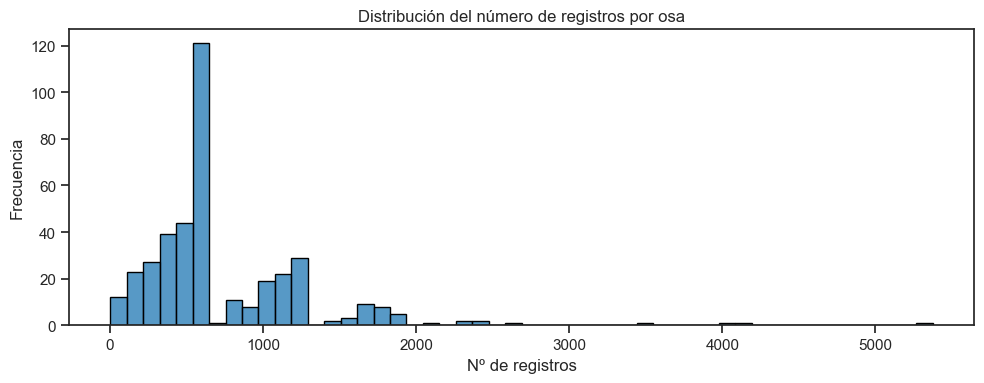

In [109]:
plt.figure(figsize=(10, 4))
sns.histplot(registros_por_osa, bins=50, color="#1f77b4")
plt.title("Distribución del número de registros por osa")
plt.xlabel("Nº de registros")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


* Alta variabilidad en el número de registros por osa.

* La mayoría tienen entre 500 y 1500 registros.

* Hay algunos outliers de seguimiento muy intensivo (larga duración o alta frecuencia).

### 2. Longitud de trayectorias

* en tiempo

In [129]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["date"] = pd.to_datetime(df["timestamp"]).dt.date
dias_tracking = df.groupby("UniqueAnimalID")["date"].agg(["min", "max"])

dias_tracking["min"] = pd.to_datetime(dias_tracking["min"])
dias_tracking["max"] = pd.to_datetime(dias_tracking["max"])

dias_tracking["dias_tracking"] = (dias_tracking["max"] - dias_tracking["min"]).dt.days + 1
dias_tracking = dias_tracking.reset_index()

In [130]:
dias_tracking

,UniqueAnimalID,min,max,dias_tracking
0,1,1986-07-01,1986-11-30,153
1,3,1985-07-01,1986-11-22,510
2,4,1988-07-01,1990-11-28,881
3,5,1992-07-01,2002-11-30,3805
4,10,1998-07-01,1999-11-30,518
...,...,...,...,...
388,536,2011-07-01,2014-11-30,1249
389,537,2008-08-21,2008-11-16,88
390,539,2009-07-01,2009-10-19,111
391,540,2009-08-18,2009-11-09,84


* en espacio 

In [141]:
distancias_totales = df.groupby("UniqueAnimalID")["distance_km"].sum().reset_index()
distancias_totales.columns = ["UniqueAnimalID", "TotalDistance_km"]
distancias_totales.head()


,UniqueAnimalID,TotalDistance_km
0,1,2261.865676
1,3,4553.310928
2,4,7025.163607
3,5,18633.115968
4,10,7340.151230


In [132]:
distancias_totales.sort_values(by='TotalDistance_km',ascending=False)

,UniqueAnimalID,TotalDistance_km
41,56,34022.903720
202,297,22401.384139
28,41,18884.120888
3,5,18633.115968
190,280,15130.945118
...,...,...
384,532,332.356433
386,534,312.515229
266,374,306.526263
341,472,32.851453


* combinado

In [133]:
resumen_trayectorias = pd.merge(dias_tracking, distancias_totales, on="UniqueAnimalID")
resumen_trayectorias["distance_per_day"] = resumen_trayectorias["TotalDistance_km"] / resumen_trayectorias["dias_tracking"]
resumen_trayectorias.head()

,UniqueAnimalID,min,max,dias_tracking,TotalDistance_km,distance_per_day
0,1,1986-07-01,1986-11-30,153,2261.865676,14.783436
1,3,1985-07-01,1986-11-22,510,4553.310928,8.928061
2,4,1988-07-01,1990-11-28,881,7025.163607,7.974079
3,5,1992-07-01,2002-11-30,3805,18633.115968,4.897008
4,10,1998-07-01,1999-11-30,518,7340.151230,14.170176


* generar resumen extendido con media de `long`, `lat` y `year`

In [136]:
coord_avg = df.groupby("UniqueAnimalID")[["mu_lat", "mu_lon"]].mean().reset_index()
coord_avg.columns = ["UniqueAnimalID", "AvgLatitude", "AvgLongitude"]

# Fusionar al resumen
resumen_trayectorias = resumen_trayectorias.merge(coord_avg, on="UniqueAnimalID")

In [137]:
year_start = df.groupby("UniqueAnimalID")["timestamp"].min().dt.year.reset_index()
year_start.columns = ["UniqueAnimalID", "Year"]

resumen_trayectorias = resumen_trayectorias.merge(year_start, on="UniqueAnimalID")

* Guardar resumen extendido

In [138]:
resumen_trayectorias.to_parquet("../data/processed/resumen_trayectorias.parquet", index=False)
resumen_trayectorias.to_csv("../data/processed/resumen_trayectorias.csv", index=False)

In [139]:
resumen_trayectorias.head()

,UniqueAnimalID,min,max,dias_tracking,TotalDistance_km,distance_per_day,AvgLatitude,AvgLongitude,Year
0,1,1986-07-01,1986-11-30,153,2261.865676,14.783436,70.256209,-143.788483,1986
1,3,1985-07-01,1986-11-22,510,4553.310928,8.928061,72.127534,-143.767269,1985
2,4,1988-07-01,1990-11-28,881,7025.163607,7.974079,71.304910,-145.280803,1988
3,5,1992-07-01,2002-11-30,3805,18633.115968,4.897008,70.229621,-143.900064,1992
4,10,1998-07-01,1999-11-30,518,7340.151230,14.170176,73.298091,-148.657747,1998


## 8. Distribuciones de distancia, velocidad y aceleración

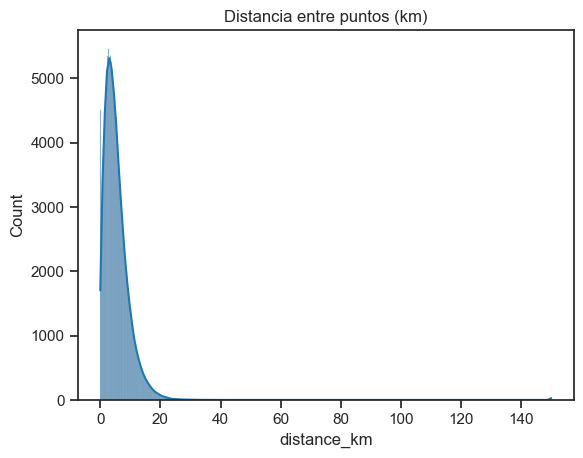

In [114]:
# fig, axs = plt.subplots(1, 1, figsize=(18, 4))
sns.histplot(df["distance_km"], kde=True)
plt.title("Distancia entre puntos (km)");

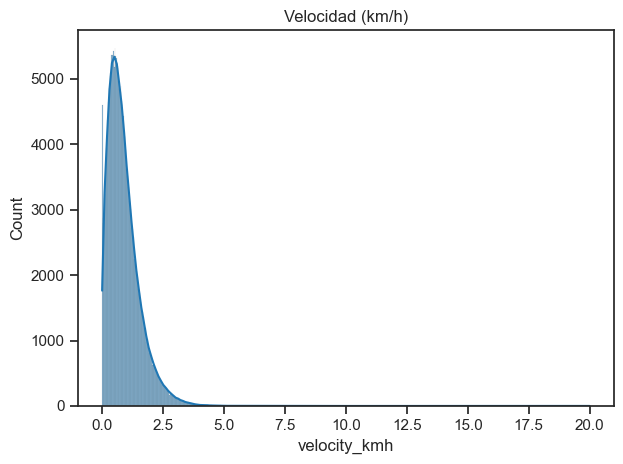

In [115]:
sns.histplot(df["velocity_kmh"], kde=True)
plt.title("Velocidad (km/h)")
plt.tight_layout()
plt.show();

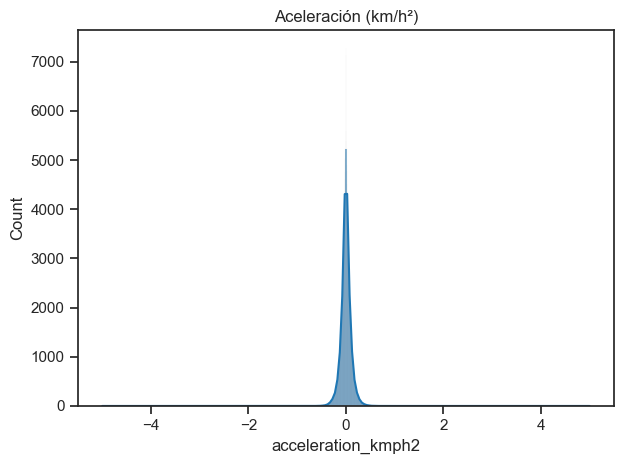

In [116]:
sns.histplot(df["acceleration_kmph2"], kde=True)
plt.title("Aceleración (km/h²)")
plt.tight_layout()
plt.show();

## 8. Distancia media por año

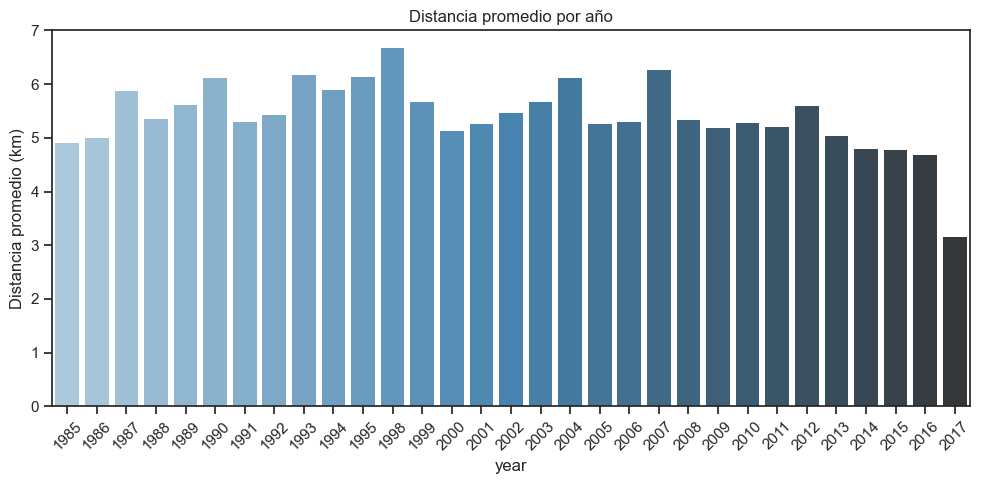

In [117]:
df_yearly = df.groupby("year")["distance_km"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_yearly, x="year", y="distance_km", palette="Blues_d")
plt.title("Distancia promedio por año")
plt.ylabel("Distancia promedio (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [140]:
df.head()

,UniqueAnimalID,timestamp,mu_lat,mu_lon,se_mu_x,se_mu_y,adj_lat,adj_lon,prev_lat,prev_lon,...,time_diff_hr,velocity_kmh,prev_velocity,acceleration_kmph2,date,daylight_hours,is_polar_night,is_midnight_sun,year,month
0,1,1986-07-01 12:00:00,69.7718,-141.3942,9375,9375,69.761663,-141.428310,69.769565,-141.323069,...,6.0,0.693069,NaN,NaN,1986-07-01,24.0,False,True,1986,1986-07
1,1,1986-07-01 18:00:00,69.7730,-141.3960,5835,5835,69.772693,-141.403451,69.761663,-141.428310,...,6.0,0.260104,0.693069,-0.072161,1986-07-01,24.0,False,True,1986,1986-07
2,1,1986-07-02 00:00:00,69.7738,-141.3834,2517,2517,69.773429,-141.388987,69.772693,-141.403451,...,6.0,0.094055,0.260104,-0.027675,1986-07-02,24.0,False,True,1986,1986-07
3,1,1986-07-02 06:00:00,69.7736,-141.3448,5323,5323,69.764930,-141.331186,69.773429,-141.388987,...,6.0,0.404117,0.094055,0.051677,1986-07-02,24.0,False,True,1986,1986-07
4,1,1986-07-02 12:00:00,69.7727,-141.2902,8840,8840,69.783728,-141.265125,69.764930,-141.331186,...,6.0,0.550249,0.404117,0.024355,1986-07-02,24.0,False,True,1986,1986-07


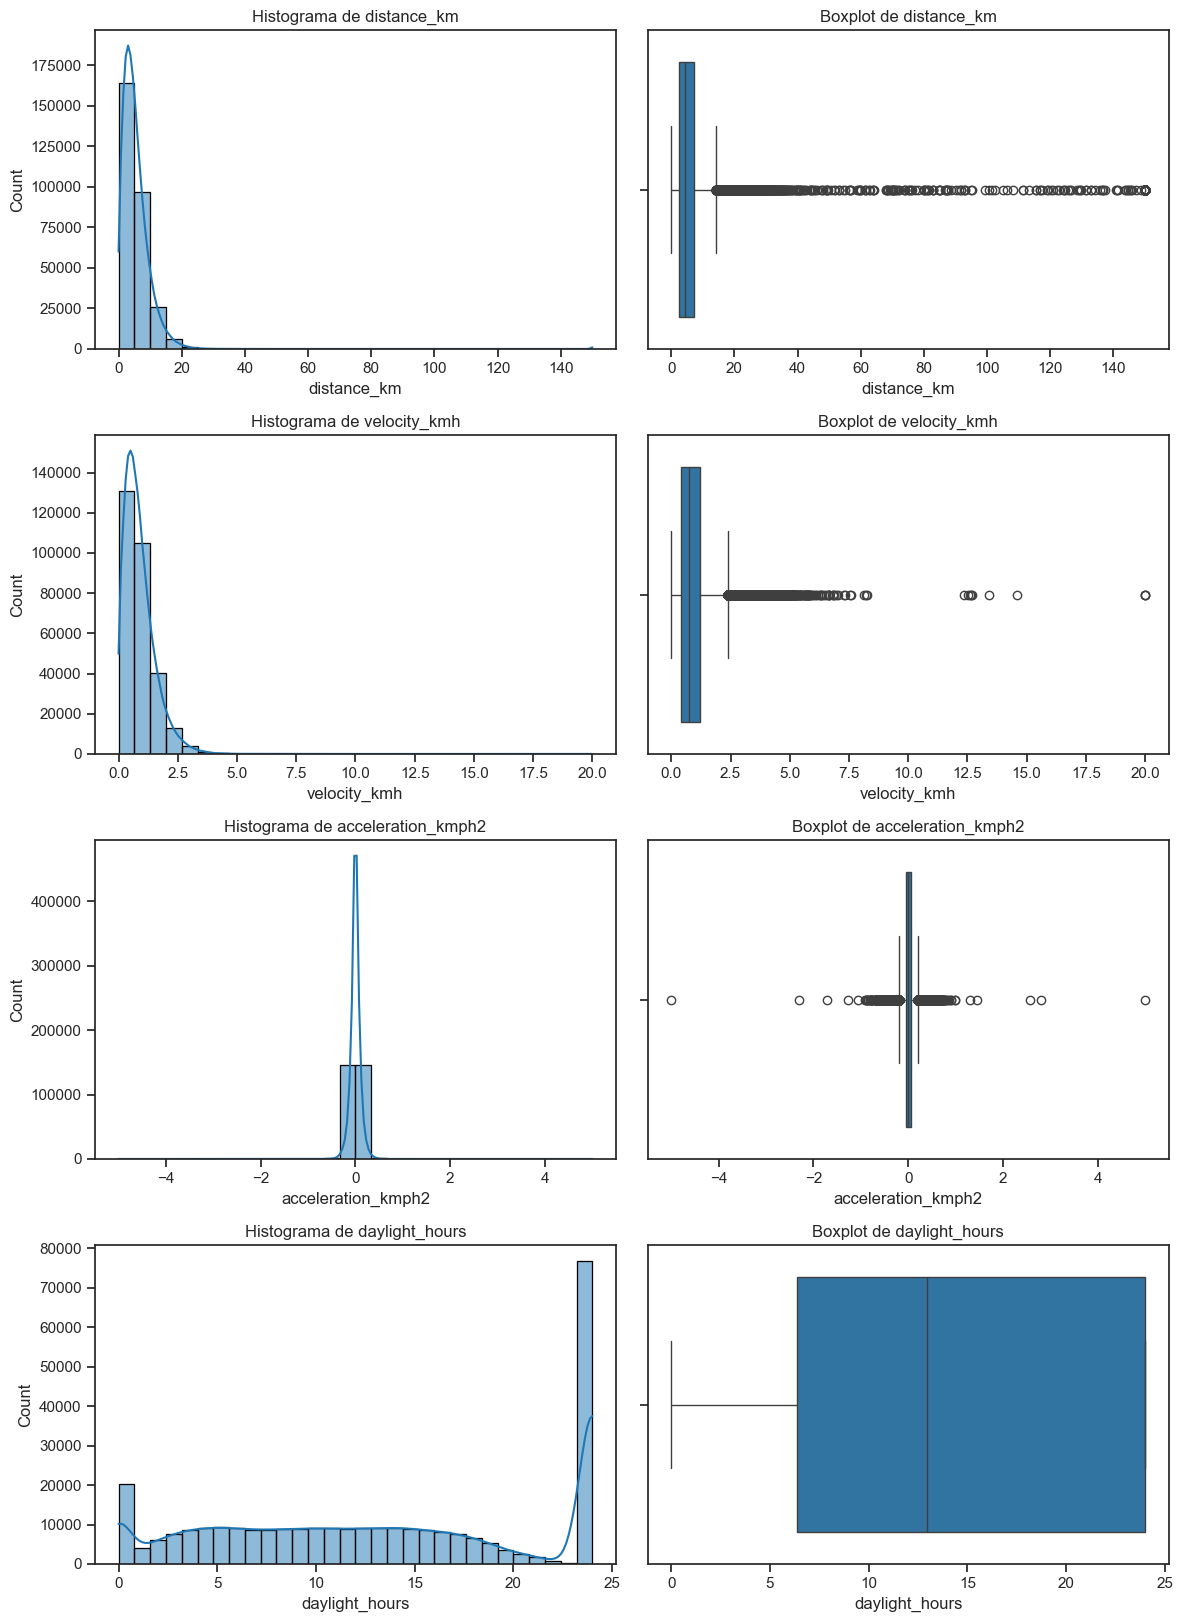

In [118]:
variables = [
    'distance_km',
    'velocity_kmh',
    'acceleration_kmph2',
    'daylight_hours',
    # 'cdr_seaice_conc',
    # 'distance_per_day'
]

plt.figure(figsize=(12, 24))

for i, var in enumerate(variables):
    plt.subplot(6, 2, 2*i+1)
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {var}')
    
    plt.subplot(6, 2, 2*i+2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show();


In [119]:
df.head()

,UniqueAnimalID,timestamp,mu_lat,mu_lon,se_mu_x,se_mu_y,adj_lat,adj_lon,prev_lat,prev_lon,...,time_diff_hr,velocity_kmh,prev_velocity,acceleration_kmph2,date,daylight_hours,is_polar_night,is_midnight_sun,year,month
0,1,1986-07-01 12:00:00,69.7718,-141.3942,9375,9375,69.761663,-141.428310,69.769565,-141.323069,...,6.0,0.693069,NaN,NaN,1986-07-01,24.0,False,True,1986,1986-07
1,1,1986-07-01 18:00:00,69.7730,-141.3960,5835,5835,69.772693,-141.403451,69.761663,-141.428310,...,6.0,0.260104,0.693069,-0.072161,1986-07-01,24.0,False,True,1986,1986-07
2,1,1986-07-02 00:00:00,69.7738,-141.3834,2517,2517,69.773429,-141.388987,69.772693,-141.403451,...,6.0,0.094055,0.260104,-0.027675,1986-07-02,24.0,False,True,1986,1986-07
3,1,1986-07-02 06:00:00,69.7736,-141.3448,5323,5323,69.764930,-141.331186,69.773429,-141.388987,...,6.0,0.404117,0.094055,0.051677,1986-07-02,24.0,False,True,1986,1986-07
4,1,1986-07-02 12:00:00,69.7727,-141.2902,8840,8840,69.783728,-141.265125,69.764930,-141.331186,...,6.0,0.550249,0.404117,0.024355,1986-07-02,24.0,False,True,1986,1986-07
